<a href="https://colab.research.google.com/github/fequeiroz/artificial-inteligence/blob/main/III%20UNIDADE/sistema_de_recomendacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [15]:
df_ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';' ,encoding="latin-1", error_bad_lines=False)
df_users = pd.read_csv('BX-Users.csv', sep=';', encoding="latin-1", error_bad_lines=False)
df_books = pd.read_csv('BX-Books.csv', sep=';', encoding="latin-1", error_bad_lines=False)


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'


In [12]:
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [16]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [17]:
df_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [18]:
df_books = df_books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]
df_books.rename(columns = {'Book-Title': 'Título', 'Book-Author': 'Autor', 'Year-Of-Publication': 'Ano', 'Publisher': 'Editora'}, inplace=True)
df_users.rename(columns = {'User-ID': 'Usuário', 'Location': 'Localização', 'Age': 'Idade'}, inplace=True)
df_ratings.rename(columns= {'User-ID': 'Usuário', 'Book-Rating': 'Avaliação'},inplace=True) 

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


(array([716109.,   1770.,   2759.,   5996.,   8904.,  50974.,  36924.,
         76457., 103736., 146151.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

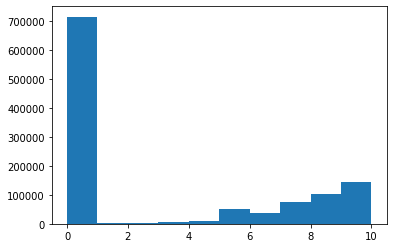

In [19]:

plt.hist(df_ratings['Avaliação'])



In [20]:
x = df_ratings['Usuário'].value_counts() > 50
print(x)
y = x[x].index
print(f'Quantidade de usuários que fizeram mais de 50 avaliações é {y.shape}')

11676      True
198711     True
153662     True
98391      True
35859      True
          ...  
116180    False
116166    False
116154    False
116137    False
276723    False
Name: Usuário, Length: 105283, dtype: bool
Quantidade de usuários que fizeram mais de 50 avaliações é (3371,)


In [21]:
df_ratings = df_ratings[df_ratings['Usuário'].isin(y)]
df_ratings_books = df_ratings.merge(df_books, on='ISBN')
df_ratings_books.head()

,Usuário,ISBN,Avaliação,Título,Autor,Ano,Editora
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books


In [22]:
number_rating = df_ratings_books.groupby('Título')['Avaliação'].count().reset_index()
number_rating

,Título,Avaliação
0,A Light in the Storm: The Civil War Diary of ...,4
1,Apple Magic (The Collector's series),1
2,Beyond IBM: Leadership Marketing and Finance ...,1
3,Dark Justice,1
4,Earth Prayers From around the World: 365 Pray...,6
...,...,...
105668,Ã?Â?berallnie. AusgewÃ?Â¤hlte Gedichte 1928 - ...,1
105669,Ã?Â?bermorgen.,1
105670,Ã?Â?rger mit Produkt X. Roman.,3
105671,Ã?Â?stlich der Berge.,1


In [23]:
number_rating.rename(columns= {'Avaliação': 'Quantidade de avaliações'}, inplace=True)
tabela_finalizada = df_ratings_books.merge(number_rating, on = 'Título')
tabela_finalizada

,Usuário,ISBN,Avaliação,Título,Autor,Ano,Editora,Quantidade de avaliações
0,276847,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books,195
1,278418,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books,195
2,5483,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books,195
3,7346,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books,195
4,8362,0446364193,0,Along Came a Spider (Alex Cross Novels),James Patterson,1993.0,Warner Books,195
...,...,...,...,...,...,...,...,...
559706,276680,1582343594,0,City of Masks : A Cree Black Novel,Daniel Hecht,2004.0,Bloomsbury USA,1
559707,276688,0380790572,0,Jupiter Project,Gregory Benford,1998.0,Eos,1
559708,276688,0425150526,0,Death Crosses the Border,Janice Steinberg,1995.0,Berkley Publishing Group,1
559709,276688,0449907422,0,Jazz Funeral: A Skip Langdon Novel,Julie Smith,1993.0,Ballantine Books,1


In [24]:
tabela_finalizada = tabela_finalizada[tabela_finalizada['Quantidade de avaliações'] >= 20]
tabela_finalizada.drop_duplicates(['Usuário','Título'], inplace=True)
tabela_finalizada.shape

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(231220, 8)

In [25]:
df_book_pivot = tabela_finalizada.pivot_table(columns = 'Usuário', index='Título', values = 'Avaliação')
df_book_pivot.shape

(4793, 3288)

In [26]:
df_book_pivot.fillna(0, inplace=True)
df_book_pivot

Usuário,183,243,254,507,626,638,643,741,882,929,...,277928,277965,278026,278137,278144,278188,278418,278582,278633,278843
Título,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"14,000 Things to Be Happy About",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\ Lamb to the Slaughter and Other Stories (Penguin 60s S.)""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\O\"" Is for Outlaw""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from scipy.sparse import csr_matrix
matriz_sparce = csr_matrix(df_book_pivot)


In [28]:
model = NearestNeighbors(algorithm='brute')



In [29]:
model.fit(matriz_sparce)

NearestNeighbors(algorithm='brute')

## Algumas sugestões

In [30]:
distances, suggestions = model.kneighbors(df_book_pivot.iloc[2,:].values.reshape(1,-1))



print(f'Se gostou de {df_book_pivot.index[suggestions[0][0]]}, pode gostar de: ')
for i in range(len(suggestions)):
    print(df_book_pivot.index[suggestions[i]])


Se gostou de 101 Dalmatians, pode gostar de: 
Index(['101 Dalmatians', 'Egg Monsters from Mars (Goosebumps, No 42)',
       'Falling Bodies', 'Lovely in Her Bones', 'Et the Extra Terrestrial'],
      dtype='object', name='Título')


In [31]:
distances, suggestions = model.kneighbors(df_book_pivot.iloc[6,:].values.reshape(1,-1))



print(f'Se gostou de {df_book_pivot.index[suggestions[0][0]]}, pode gostar de: ')
for i in range(len(suggestions)):
    print(df_book_pivot.index[suggestions[i]])

Se gostou de 1st to Die: A Novel, pode gostar de: 
Index(['1st to Die: A Novel',
       'When the Bough Breaks (Alex Delaware Novels (Paperback))',
       'Blood Test (Alex Delaware Novels (Paperback))', 'Black Market',
       'Red, White and Blue : A Novel'],
      dtype='object', name='Título')


In [32]:
distances, suggestions = model.kneighbors(df_book_pivot.iloc[10,:].values.reshape(1,-1))



print(f'Se gostou de {df_book_pivot.index[suggestions[0][0]]}, pode gostar de: ')
for i in range(len(suggestions)):
    print(df_book_pivot.index[suggestions[i]])

Se gostou de 24 Hours, pode gostar de: 
Index(['24 Hours', 'Remote Control', 'Grass', 'Hot Flashes', 'House'], dtype='object', name='Título')


In [33]:
df_book_pivot.to_csv('df_book_pivot.csv')

In [34]:
distances, suggestions = model.kneighbors(df_book_pivot.iloc[1543,:].values.reshape(1,-1))



print(f'Se gostou de {df_book_pivot.index[suggestions[0][0]]}, pode gostar de: ')
for i in range(len(suggestions)):
    print(df_book_pivot.index[suggestions[i]])

Se gostou de Heidi, pode gostar de: 
Index(['Heidi', 'Et the Extra Terrestrial', 'Hot Flashes', 'Gone to Soldiers',
       'Such Devoted Sisters'],
      dtype='object', name='Título')


In [35]:
distances, suggestions = model.kneighbors(df_book_pivot.iloc[2535,:].values.reshape(1,-1))



print(f'Se gostou de {df_book_pivot.index[suggestions[0][0]]}, pode gostar de: ')
for i in range(len(suggestions)):
    print(df_book_pivot.index[suggestions[i]])

Se gostou de PRIVATE AFFAIRS, pode gostar de: 
Index(['PRIVATE AFFAIRS', 'Such Devoted Sisters', 'House', 'The Plan',
       'The Curse of the Mummy's Tomb (Goosebumps, No 5)'],
      dtype='object', name='Título')
